In [25]:
import os
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Data_bef_pipe.csv')

In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732,0
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567,0
2,2017,12,1,14107,14771,16.0,2052,13.0,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804,0
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361,0
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289,0
1832248,2016,1,3,14107,11292,42.0,2259,39.0,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062,1
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000,1
1832250,2016,1,3,13930,13204,74.0,1312,67.0,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598,1


In [5]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732,0
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567,0
2,2017,12,1,14107,14771,16.0,2052,13.0,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804,0
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361,0
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289,0
1832248,2016,1,3,14107,11292,42.0,2259,39.0,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062,1
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000,1
1832250,2016,1,3,13930,13204,74.0,1312,67.0,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598,1


In [6]:
X = df.drop(['ArrDelayMinutes','pred_del'], axis=1)  
y = df['ArrDelayMinutes']  

In [7]:
X

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,1,14107,12892,0.0,1213,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732
1,2017,12,1,14107,12892,0.0,1852,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567
2,2017,12,1,14107,14771,16.0,2052,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804
3,2017,12,1,12892,14747,0.0,1819,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361
4,2017,12,1,11298,14771,0.0,2133,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289
1832248,2016,1,3,14107,11292,42.0,2259,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062
1832249,2016,1,3,11292,14107,58.0,2024,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000
1832250,2016,1,3,13930,13204,74.0,1312,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598


In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [37]:
y_train.shape , X_train.shape

((1282576,), (1282576, 18))

In [9]:
Lirmodel = LinearRegression()
print("running")
Lirmodel.fit(X_train,y_train)
print("predicting")
Lirmodel_pred = Lirmodel.predict(X_test)
print("completed")

running
predicting
completed


In [10]:
Lirmodel.score(X_test,y_test)

0.9324936345073576

In [26]:
mae = mean_absolute_error(y_test, Lirmodel_pred)
mse = mean_squared_error(y_test, Lirmodel_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Lirmodel_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5.580823520851904
Mean Squared Error (MSE): 117.8360873701291
Root Mean Squared Error (RMSE): 10.855233178984646
R-squared (R²): 0.9324936345073576


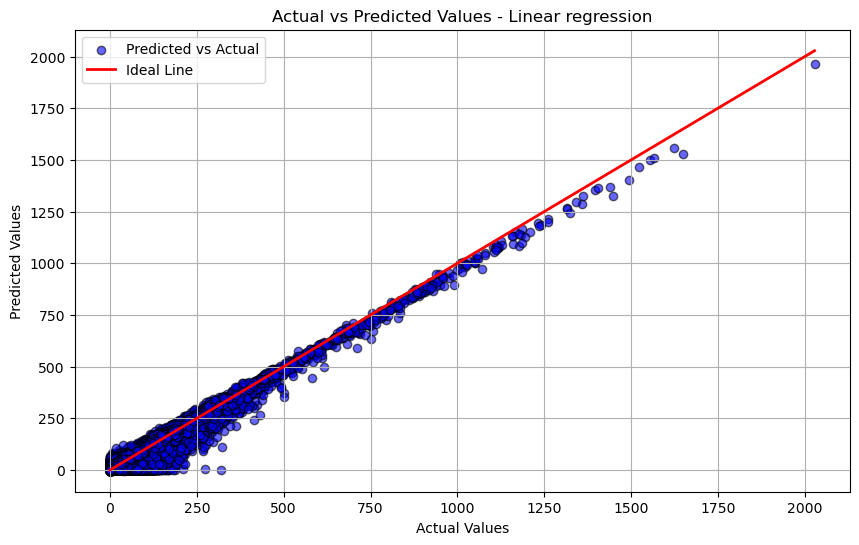

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Lirmodel_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Linear regression')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
print("starting")
etrmodel = ExtraTreesRegressor()
print("running")
etrmodel.fit(X_train, y_train)
print("Predicting")
etrpred = etrmodel.predict(X_test)
print("completed")

starting
running
Predicting
completed


In [13]:
etrmodel.score(X_test,y_test)

0.9369221485123022

In [28]:
etrpred = etrmodel.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, etrpred)
mse = mean_squared_error(y_test, etrpred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, etrpred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5.684206981324756
Mean Squared Error (MSE): 110.10587171715702
Root Mean Squared Error (RMSE): 10.493134503910499
R-squared (R²): 0.9369221485123022


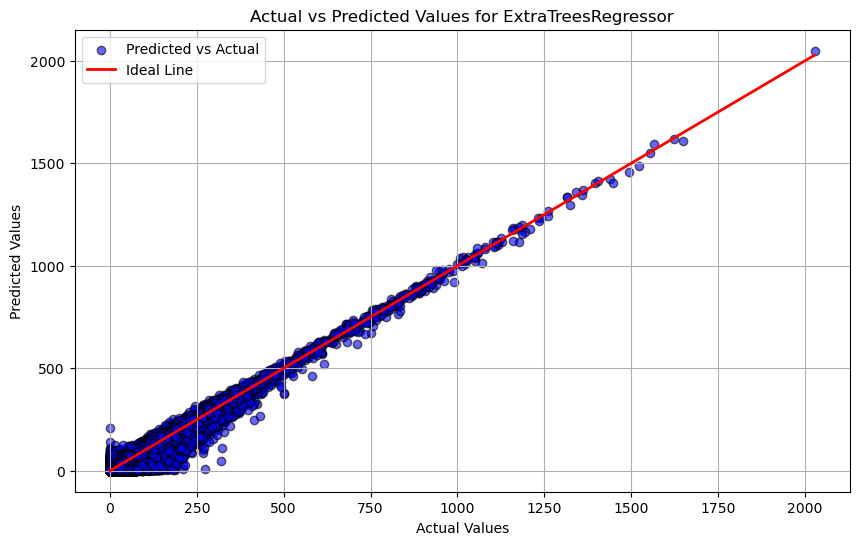

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, etrpred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for ExtraTreesRegressor')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print("Starting with RandomForestRegressor")
rfr_model = RandomForestRegressor()  
print("Running RandomForestRegressor")
rfr_model.fit(X_train, y_train)
print("Predicting with RandomForestRegressor")
rfr_pred = rfr_model.predict(X_test)
print("Completed with RandomForestRegressor")

Starting with RandomForestRegressor
Running RandomForestRegressor
Predicting with RandomForestRegressor
Completed with RandomForestRegressor


In [16]:
rfr_model.score(X_test,y_test)

0.9380377367364849

In [30]:
rfr_pred = rfr_model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, rfr_pred)
mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5.733905690626469
Mean Squared Error (MSE): 108.15855089052735
Root Mean Squared Error (RMSE): 10.399930331041999
R-squared (R²): 0.9380377367364849


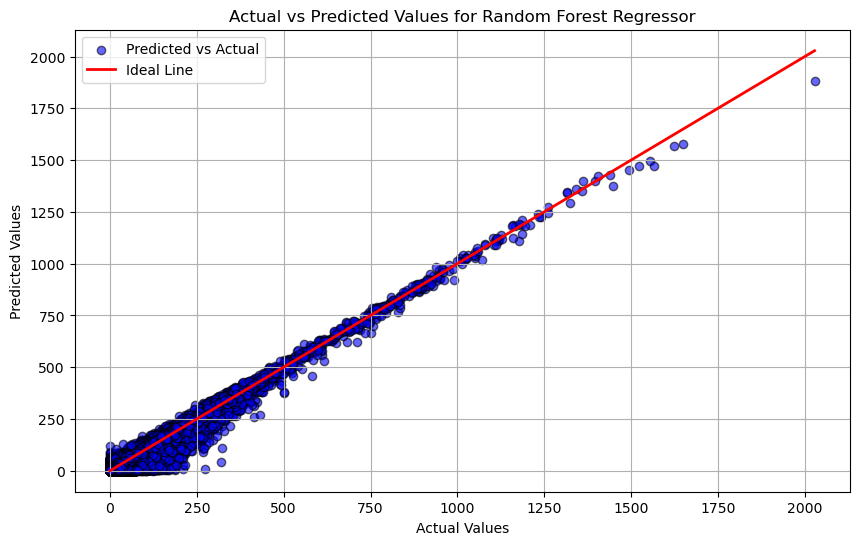

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfr_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print("Starting with XGBoostRegressor")
xgb_model = xgb.XGBRegressor()  
print("Running XGBoostRegressor")
xgb_model.fit(X_train, y_train)  
print("Predicting with XGBoostRegressor")
xgb_pred = xgb_model.predict(X_test) 
print("Completed with XGBoostRegressor")

Starting with XGBoostRegressor
Running XGBoostRegressor
Predicting with XGBoostRegressor
Completed with XGBoostRegressor


In [19]:
xgb_model.score(X_test,y_test)

0.8857358158329536

In [32]:
xgb_pred = xgb_model.predict(X_test) 

In [33]:
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5.757413963119308
Mean Squared Error (MSE): 199.4544409334571
Root Mean Squared Error (RMSE): 14.122834026266014
R-squared (R²): 0.9380377367364849


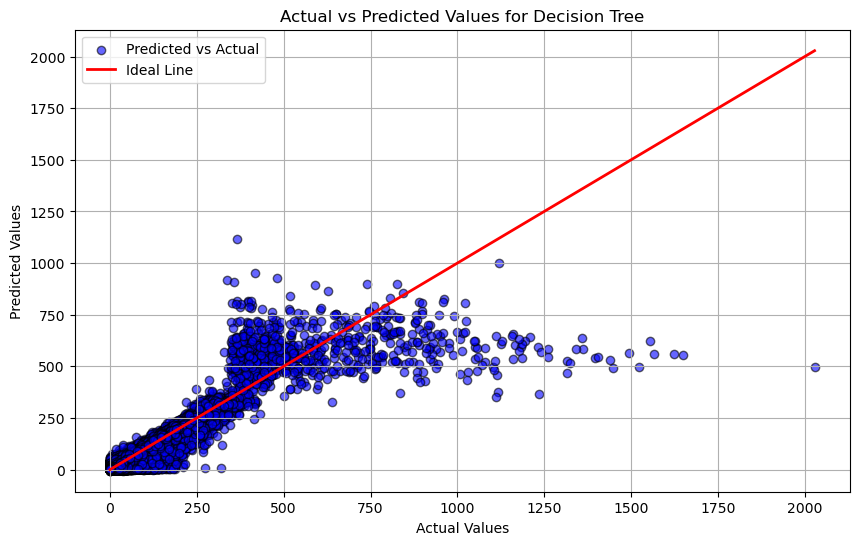

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
rfr_pred = rfr_model.predict(X)

In [34]:
rfr_model.score(X,y)

0.9749367187622324